In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import resultcomp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import plots

In [27]:
directories= ['baseline', 'model', '20200424_102051']

In [28]:
snational, seast, swest = resultcomp.read_results(directories=directories)

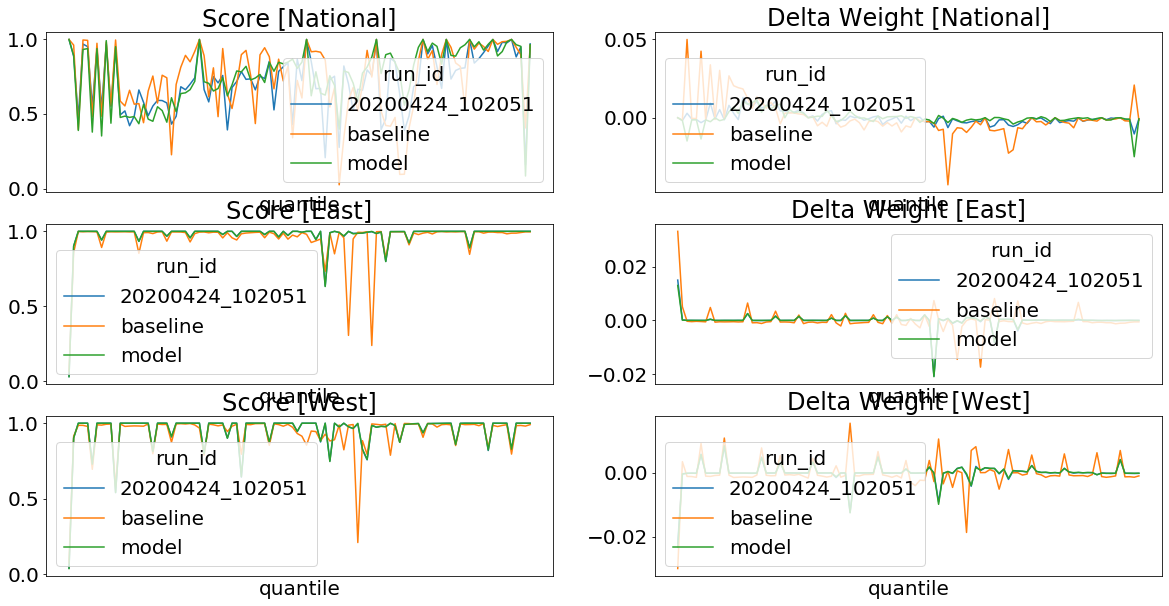

In [29]:
_ = resultcomp.plot_scores(snational, seast, swest)

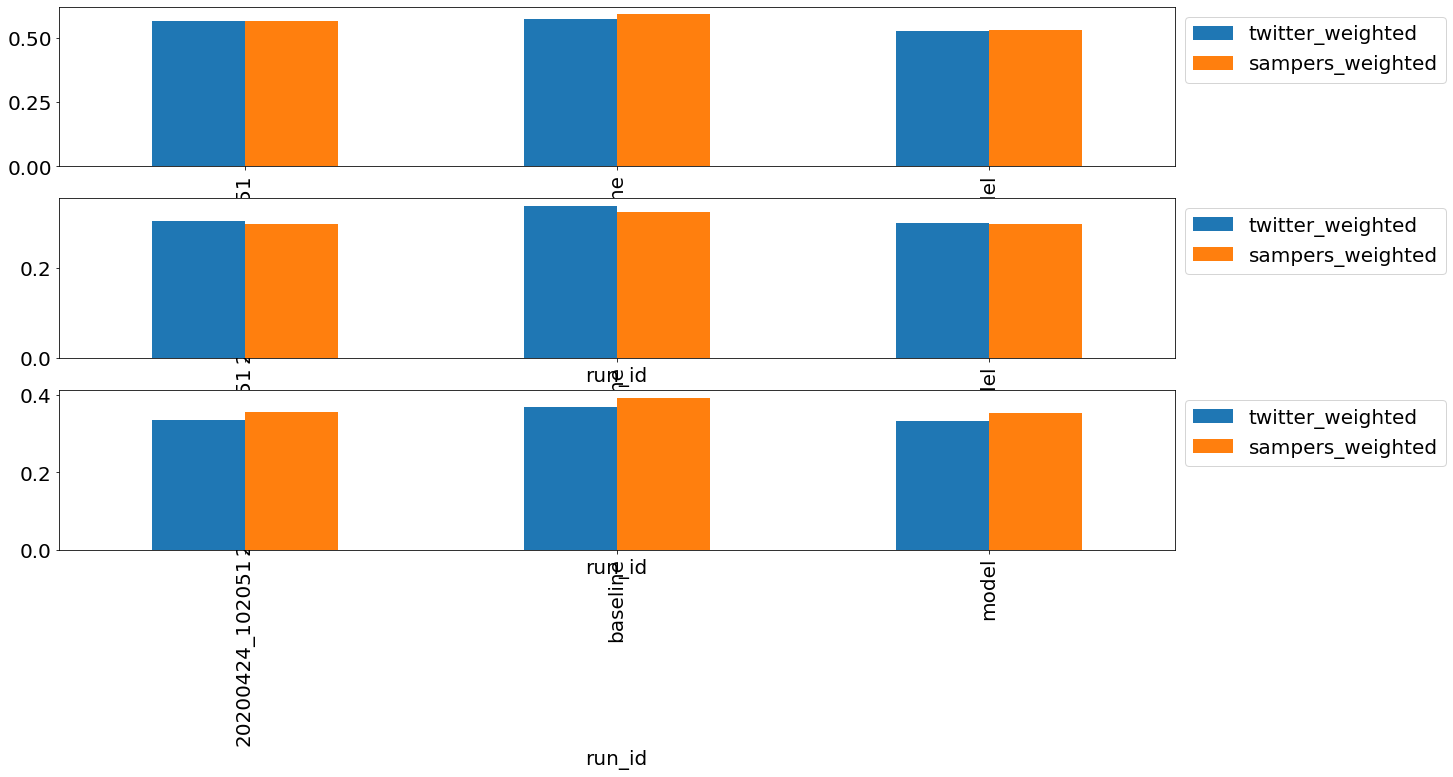

In [30]:
_ = resultcomp.plot_score_summary(snational, seast, swest)

In [31]:
dms = resultcomp.read_distance_metrics(directories=directories)


In [32]:
dms = dms[dms['sampers_mean'] != 0.0]
dms = dms.reset_index()
dms['run_id'] = dms['run_id'].str.title()
dms = dms.set_index(['scale', 'run_id', 'distance'])
dms

model_mean  gravity_seed_mean  \
scale    run_id          distance                                               
national Baseline        (95.338, 102.07]     1.703611e-06       1.265390e-05   
                         (102.07, 108.851]    4.809886e-06       3.411839e-05   
                         (108.851, 115.402]   6.070375e-06       2.789140e-05   
                         (115.402, 121.788]   5.139976e-06       2.297667e-05   
                         (121.788, 128.103]   4.585608e-06       1.899057e-05   
...                                                    ...                ...   
west     20200424_102051 (295.923, 316.2]     1.139480e-09       6.192111e-11   
                         (316.2, 341.702]     1.323237e-09       3.044043e-11   
                         (341.702, 379.925]   2.040037e-09       1.214290e-11   
                         (379.925, 466.471]   7.112399e-09       2.947716e-12   
                         (466.471, 1416.072]  3.400061e-09       6.037986e-14   

                                              gravity_mean  sampers_mean  \
scale    run_id          distance                                          
national Baseline        (95.338, 102.07]     6.408754e-06  6.192792e-06   
                         (102.07, 108.851]    1.646461e-05  1.556160e-05   
                         (108.851, 115.402]   1.534940e-05  1.520865e-05   
                         (115.402, 121.788]   1.193670e-05  1.241070e-05   
                         (121.788, 128.103]   7.879588e-06  1.109036e-05   
...                                                    ...           ...   
west     20200424_102051 (295.923, 316.2]     2.419483e-10  3.687802e-11   
                         (316.2, 341.702]     9.711551e-11  4.511090e-11   
                         (341.702, 379.925]   3.851966e-11  2.322601e-11   
                         (379.925, 466.471]   1.473538e-11  1.447649e-10   
                         (466.471, 1416.072]  3.682531e-13  5.353729e-12   

                                              model_variance  \
scale    run_id          distance                              
national Baseline        (95.338, 102.07]       1.230496e-10   
                         (102.07, 108.851]      5.637306e-10   
                         (108.851, 115.402]     1.579481e-09   
                         (115.402, 121.788]     6.054027e-10   
                         (121.788, 128.103]     8.223435e-10   
...                                                      ...   
west     20200424_102051 (295.923, 316.2]       7.892177e-15   
                         (316.2, 341.702]       3.974571e-15   
                         (341.702, 379.925]     6.375903e-15   
                         (379.925, 466.471]     7.819987e-14   
                         (466.471, 1416.072]    1.200670e-14   

                                              gravity_seed_variance  \
scale    run_id          distance                                     
national Baseline        (95.338, 102.07]              3.327533e-10   
                         (102.07, 108.851]             4.095704e-12   
                         (108.851, 115.402]            2.541416e-12   
                         (115.402, 121.788]            1.596755e-12   
                         (121.788, 128.103]            1.075434e-12   
...                                                             ...   
west     20200424_102051 (295.923, 316.2]              1.097310e-22   
                         (316.2, 341.702]              4.229649e-23   
                         (341.702, 379.925]            1.573225e-23   
                         (379.925, 466.471]            3.237203e-24   
                         (466.471, 1416.072]           1.468048e-26   

                                              gravity_variance  \
scale    run_id          distance                                
national Baseline        (95.338, 102.07]         2.449200e-09   
                         (102.07, 108.851]        

Model MSE: 2.21276e-05
Baseline MSE: 1.48754e-04
20200424_102051 MSE: 1.69651e-05


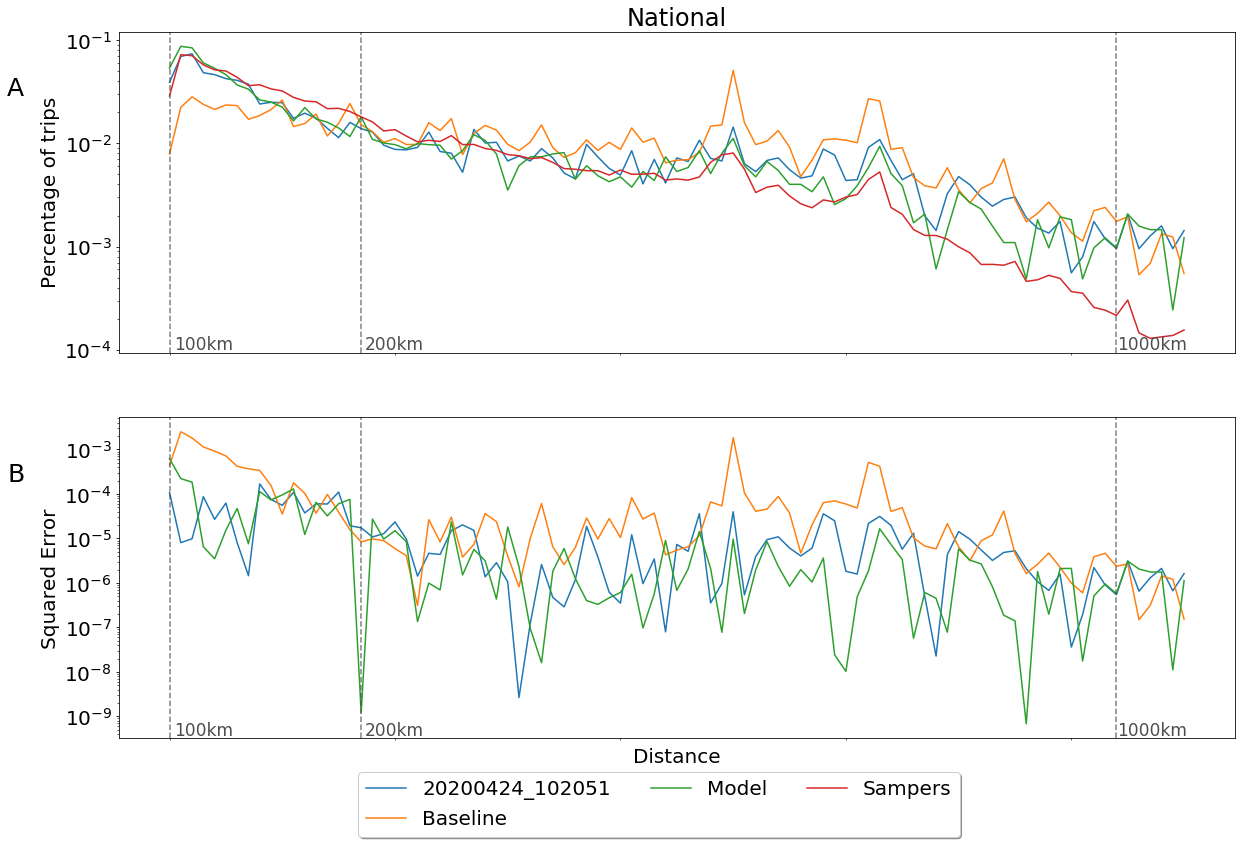

In [33]:
fig, axes = plots.plot_dist_distribution(dms, 'national')

axes[0].axvline(0, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(0, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.05, 0.01, "100km", transform=axes[0].transAxes, fontsize='17', c='0.3')
axes[1].text(0.05, 0.01, "100km", transform=axes[1].transAxes, fontsize='17', c='0.3')

axes[0].axvline(17, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(17, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.22, 0.01, "200km", transform=axes[0].transAxes, fontsize='17', c='0.3')
axes[1].text(0.22, 0.01, "200km", transform=axes[1].transAxes, fontsize='17', c='0.3')

axes[0].axvline(84, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(84, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.895, 0.01, "1000km", transform=axes[0].transAxes, fontsize='17', c='0.3')
axes[1].text(0.895, 0.01, "1000km", transform=axes[1].transAxes, fontsize='17', c='0.3')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.1),
      fancybox=True, shadow=True, ncol=3, bbox_transform = plt.gcf().transFigure)
fig.savefig('national_dd.png', dpi=160, bbox_inches='tight')

Model MSE: 7.20657e-06
Baseline MSE: 2.06107e-05
20200424_102051 MSE: 7.74745e-06


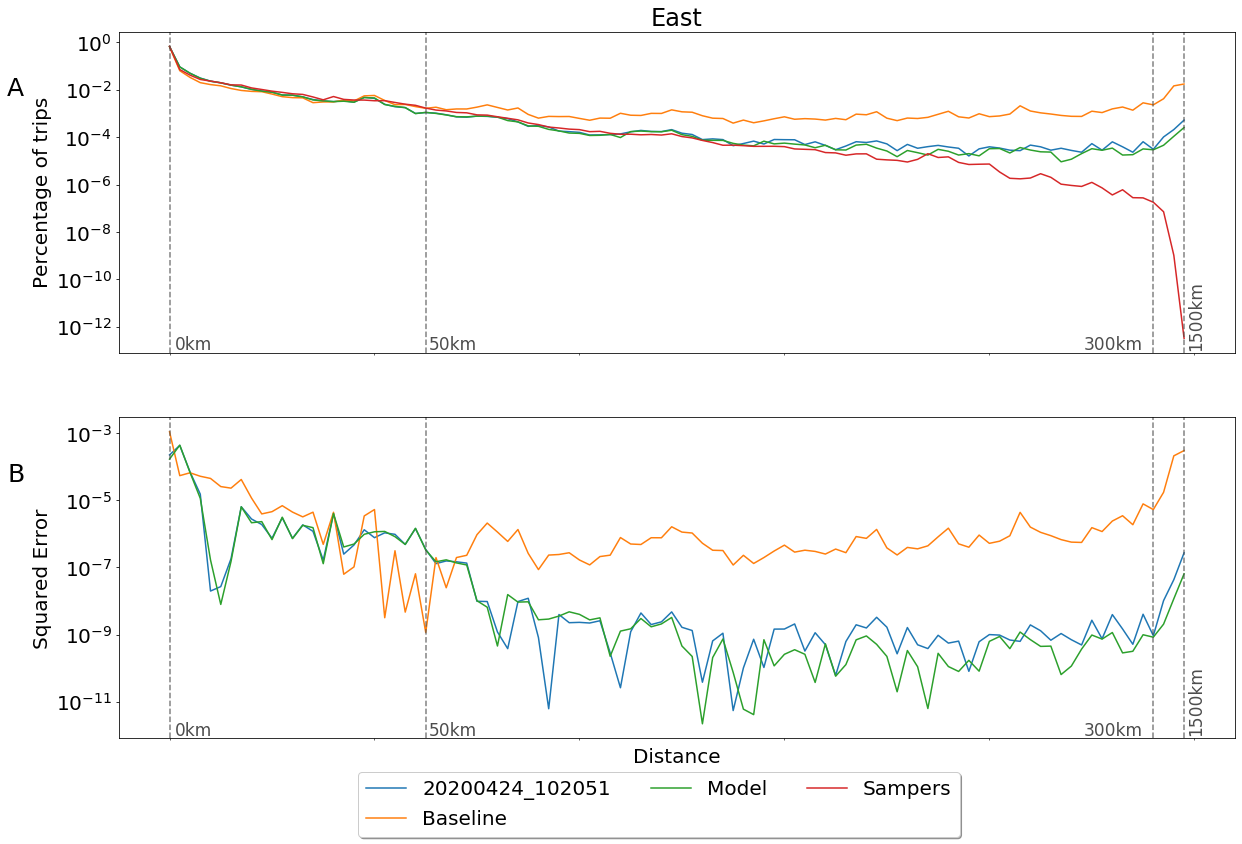

In [34]:
fig, axes = plots.plot_dist_distribution(dms, 'east')

axes[0].axvline(0, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(0, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.05, 0.01, "0km", transform=axes[0].transAxes, fontsize='17', c='0.3')
axes[1].text(0.05, 0.01, "0km", transform=axes[1].transAxes, fontsize='17', c='0.3')

axes[0].axvline(25, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(25, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.278, 0.01, "50km", transform=axes[0].transAxes, fontsize='17', c='0.3')
axes[1].text(0.278, 0.01, "50km", transform=axes[1].transAxes, fontsize='17', c='0.3')

axes[0].axvline(96, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(96, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.865, 0.01, "300km", transform=axes[0].transAxes, fontsize='17', c='0.3')
axes[1].text(0.865, 0.01, "300km", transform=axes[1].transAxes, fontsize='17', c='0.3')

axes[0].axvline(99, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(99, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.957, 0.02, "1500km", transform=axes[0].transAxes, fontsize='17', c='0.3', rotation='vertical')
axes[1].text(0.957, 0.02, "1500km", transform=axes[1].transAxes, fontsize='17', c='0.3', rotation='vertical')


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.1),
      fancybox=True, shadow=True, ncol=3, bbox_transform = plt.gcf().transFigure)
fig.savefig('east_dd.png', dpi=160, bbox_inches='tight')

Model MSE: 1.04635e-05
Baseline MSE: 2.51541e-05
20200424_102051 MSE: 9.80175e-06


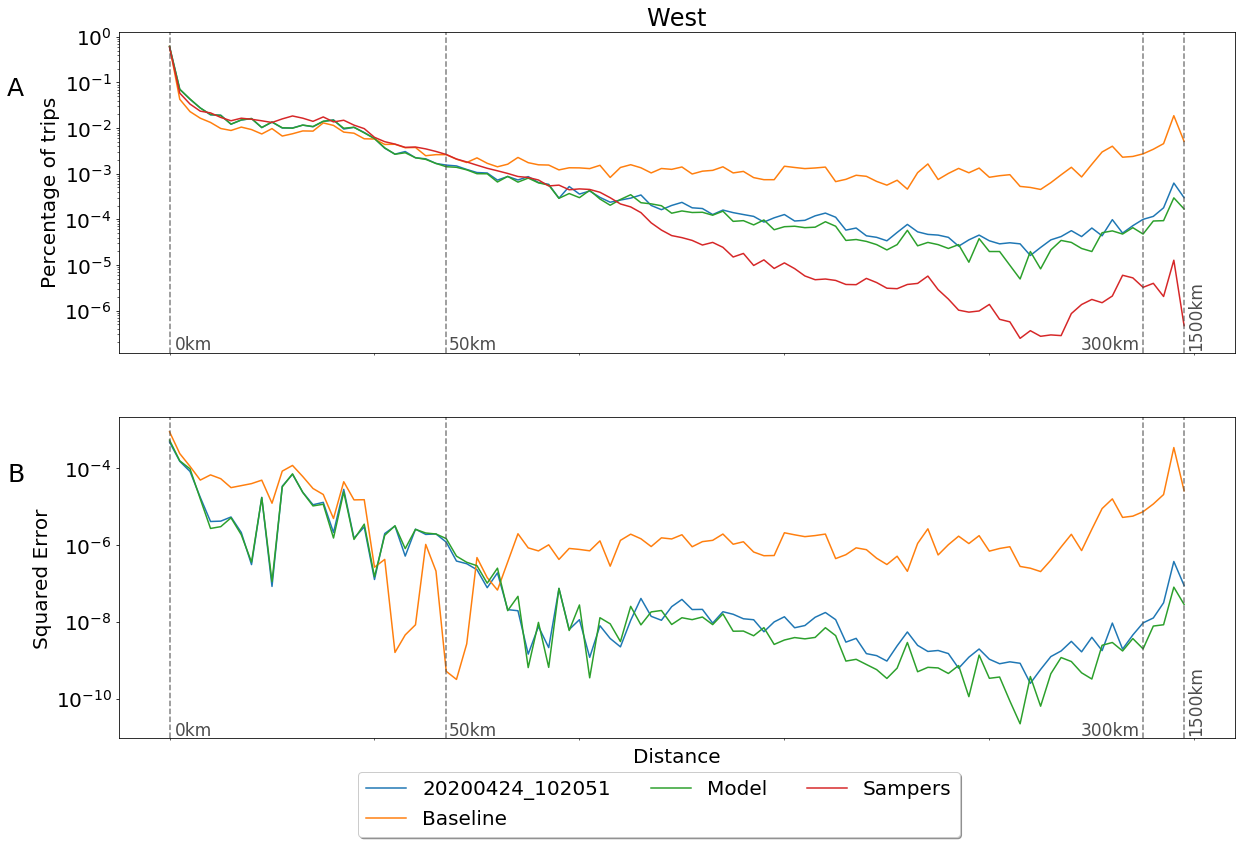

In [35]:
fig, axes = plots.plot_dist_distribution(dms, 'west')

axes[0].axvline(0, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(0, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.05, 0.01, "0km", transform=axes[0].transAxes, fontsize='17', c='0.3')
axes[1].text(0.05, 0.01, "0km", transform=axes[1].transAxes, fontsize='17', c='0.3')

axes[0].axvline(27, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(27, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.296, 0.01, "50km", transform=axes[0].transAxes, fontsize='17', c='0.3')
axes[1].text(0.296, 0.01, "50km", transform=axes[1].transAxes, fontsize='17', c='0.3')

axes[0].axvline(95, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(95, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.862, 0.01, "300km", transform=axes[0].transAxes, fontsize='17', c='0.3')
axes[1].text(0.862, 0.01, "300km", transform=axes[1].transAxes, fontsize='17', c='0.3')

axes[0].axvline(99, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(99, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.957, 0.02, "1500km", transform=axes[0].transAxes, fontsize='17', c='0.3', rotation='vertical')
axes[1].text(0.957, 0.02, "1500km", transform=axes[1].transAxes, fontsize='17', c='0.3', rotation='vertical')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.1),
      fancybox=True, shadow=True, ncol=3, bbox_transform = plt.gcf().transFigure)
fig.savefig('west_dd.png', dpi=160, bbox_inches='tight')